In [1]:
from tensorflow.keras.models import load_model
model = load_model('FaceMaskDec.h5')

In [2]:
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [3]:
image_path = 'portrait-female-researcher-with-medical-mask-copy-space.jpg'  # Replace with the actual path to your image

1/1 [==============================] - 0s 136ms/step


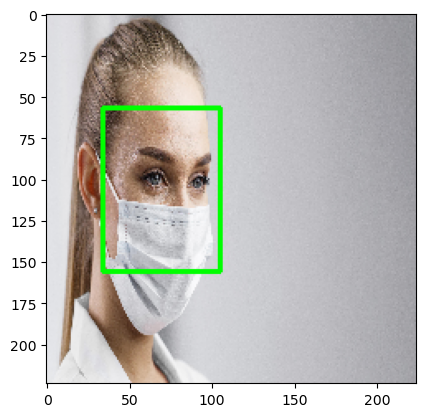

1/1 [==============================] - 0s 78ms/step
Probability of 'without mask': 0.00%
Probability of 'with mask': 100.00%
Predicted class: with mask


In [4]:
from keras.preprocessing import image
import numpy as np
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    # Load and preprocess the input data using the provided method
    img = image.img_to_array(image.load_img(image_path, target_size=(224, 224, 3)))
    return img

def detect_and_draw_box(img):
    # Use the MTCNN face detector
    detector = MTCNN()
    faces = detector.detect_faces(img)

    for face in faces:
        x, y, w, h = face['box']
        # Draw a rectangle around the detected face
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return img, faces

# Load and preprocess the image
processed_img = load_and_preprocess_image(image_path)

# Detect and draw box around faces
result_img, detected_faces = detect_and_draw_box(processed_img)

# Display the result image
plt.imshow(result_img.astype(np.uint8))
plt.show()

# Make predictions
for face in detected_faces:
    x, y, w, h = face['box']
    # Extract and preprocess the detected face
    face_img = processed_img[y:y+h, x:x+w]
    face_img = cv2.resize(face_img, (224, 224))
    processed_face = image.img_to_array(face_img) / 255.0
    processed_face = np.expand_dims(processed_face, axis=0)

    # Use the mask detection model to predict
    predictions = model.predict(processed_face)

    # Display the prediction probabilities
    print(f"Probability of 'without mask': {predictions[0][0]:.2%}")
    print(f"Probability of 'with mask': {predictions[0][1]:.2%}")

    # Determine the class with the highest probability
    predicted_class = "without mask" if predictions[0][0] > predictions[0][1] else "with mask"
    print(f"Predicted class: {predicted_class}")
